# Capstone Project: Heart Attack Prediction

##### This is a capstone project for springboards data science intensive course

#### Data:
* This data was composed of 4 different databases including Clevland Clinic Foundation, V.A Medical Center, University Hospital in Zurich, Switzerland, and the Hungarian Insitute of Cardiology,  all of which had the same format for instances.  

* There are only 14 raw attributes used in the data as opposed to the 76 original raw attributes of the overall data.


* The dataset can be found hre https://www.kaggle.com/imnikhilanand/heart-attack-prediction


#### Problem Statement:
* The decision of admitting a patient under the premise that the patient is having a heart attack based on certain criteria is a serius matter. At one point a study indicated that doctors were mistaken 9.2 percent of the time. Link: https://abcnews.go.com/Health/Healthday/story?id=4509788&page=1


* The misclassification of heart attacks and heart diseases has serious implications for patients. Studies of men and women in Wales and England have shown that women were more than 50% likely to have final diagnosis different than their initial diagnoses. An estimation that goes on to state that if patients were correctly diagnosed initially then over the decade of the study, more than 250 deaths per year might be prevented. Link: https://www.bhf.org.uk/informationsupport/heart-matters-magazine/news/behind-the-headlines/misdiagnosis


* By having a model that could correctly and with a high level of certainty classify whether or not a patient with specific chest pains and conditions will have or already suffered a heart attack would greatly increase the medical professionals ability to identify what damge has been done to the heart, to identify what degree of coronary artery disease if any a patient has suffered, what would be the following steps for a patient to have a speedily recovery and/or what steps can be taken to prevent a patient from having any inital/additional heart complications.


#### Stakeholders:
* Patients and family members, hospital cardiac units, physicians

#### Objective: 
* The objective was to create a model that would correctly classify patients with a high risk of heart attack 

#### Goal: 
* Producing a model that can classify with high percentage patients that would suffer a heart attack through certain conditions

#### Result:
* The result after trying several approaches on the data that was presented is that we have a model that can correctly classify patients with the risk of having a heart attack 80% of the time which in terms and regards of life threatening experiences for patients is good but not good enough

#### Concerns: 
* Even though the logistic model was able to classify with 84% accuracy the amount of miscalculatoin is concerning especially in regards to the type 2 errors 

#### Recommendations:

1. The first recommendation could be to accumulate more data to around a recommended a recommended age group of with specific chest pains that more than likely led to patients that suffered heart attacks

2. The second recommendation would be to collect more meaningful data around the features that would allow more for accurate models to be built i.e (type of chest pain, cholesterol levels, maximum heart rate and resting blood pressure etc).

3. A third recommendation could be to take in to account features that were left out of the dataset that were recorded and an attempt to produce models that included these features for more accuracy can be made.


# Model Performance Summary

* Initially the logistic regression model outperformed the decision tree classifier and the random forest


* After selecting the most important features from the random forest and new model was trained on those features and was still unable to outperform the logistic regression model

# Part 1. Data Wrangling

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pprint import pprint
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
%matplotlib inline

C:\Users\Andrew\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.getcwd()

'C:\\Users\\Andrew'

In [3]:
os.chdir('C://Users//Andrew/Desktop/')

In [4]:
df = pd.read_csv('heart-attack-prediction.csv')

In [5]:
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0


In [6]:
df.tail(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
287,50,1,4,140,341,0,1,125,1,2.5,2,?,?,1
288,52,1,4,140,266,0,0,134,1,2.0,2,?,?,1
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [7]:
df = df.convert_objects(convert_numeric=True)

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age           294 non-null int64
sex           294 non-null int64
cp            294 non-null int64
trestbps      293 non-null float64
chol          271 non-null float64
fbs           286 non-null float64
restecg       293 non-null float64
thalach       293 non-null float64
exang         293 non-null float64
oldpeak       294 non-null float64
slope         104 non-null float64
ca            3 non-null float64
thal          28 non-null float64
num           294 non-null int64
dtypes: float64(10), int64(4)
memory usage: 32.2 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,294.0,47.826531,7.811812,28.0,42.00,49.0,54.0,66.0
sex,294.0,0.724490,0.447533,0.0,0.00,1.0,1.0,1.0
cp,294.0,2.982993,0.965117,1.0,2.00,3.0,4.0,4.0
trestbps,293.0,132.583618,17.626568,92.0,120.00,130.0,140.0,200.0
chol,271.0,250.848708,67.657711,85.0,209.00,243.0,282.5,603.0
fbs,286.0,0.069930,0.255476,0.0,0.00,0.0,0.0,1.0
restecg,293.0,0.218430,0.460868,0.0,0.00,0.0,0.0,2.0
thalach,293.0,139.129693,23.589749,82.0,122.00,140.0,155.0,190.0
exang,293.0,0.303754,0.460665,0.0,0.00,0.0,1.0,1.0
oldpeak,294.0,0.586054,0.908648,0.0,0.00,0.0,1.0,5.0


In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

## Data wrangling/cleaning and exploratory data analysis

In [11]:
df.rename(columns = {'num       ': 'Num'}, inplace = True)

In [12]:
df2 = df.copy()

In [13]:
df['Num'].value_counts()

0    188
1    106
Name: Num, dtype: int64

In [14]:
target_counts = df.Num.value_counts()

In [15]:
print('Class 0:', target_counts[0])
print('Class 1:', target_counts[1])
print('Proportion:', round(target_counts[0] / target_counts[1], 2), ': 1')

Class 0: 188
Class 1: 106
Proportion: 1.77 : 1


##### There is an imbalanced proportion in the dataset of 1.77 to 1. For experiments sake I won't resample the target variable and see what performance is produced for now.

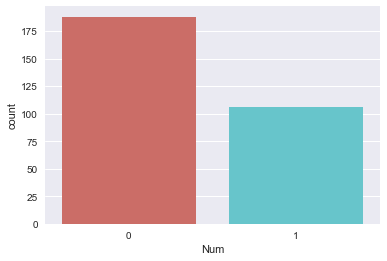

In [16]:
sns.countplot(x='Num', data = df, palette = 'hls')
plt.show()

In [17]:
df.groupby('Num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Num,,,,,,,,,,,,,
0,46.893617,0.632979,2.617021,130.732620,239.952941,0.038462,0.228723,145.005348,0.101604,0.214362,1.612903,0.0,4.866667
1,49.481132,0.886792,3.632075,135.849057,269.188119,0.125000,0.200000,128.764151,0.660377,1.245283,2.013699,0.0,6.538462


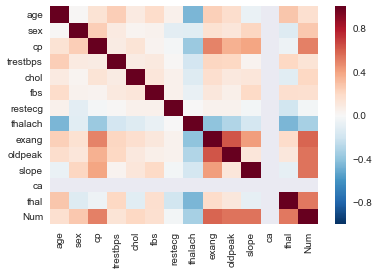

In [18]:
sns.heatmap(df.corr())

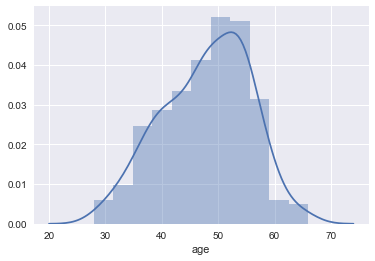

In [19]:
sns.distplot(df.age)

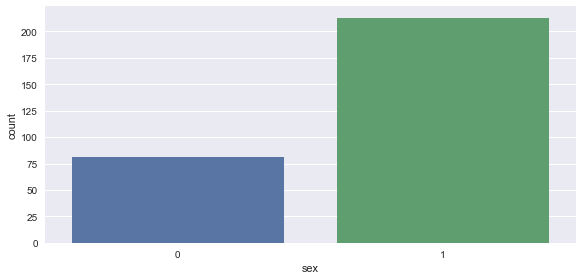

In [20]:
# There are significantly more men in the data than women
sns.factorplot('sex', data = df, kind = 'count', aspect = 2.0)

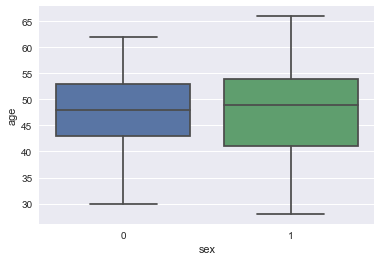

In [21]:
# A box plot to show the ranges of ages of the women and men in the data
sns.boxplot(data = df, x = 'sex', y = 'age')

In [22]:
hist_df = df.groupby('Num')

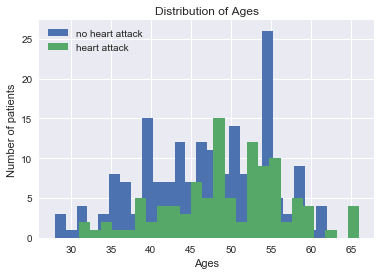

In [23]:
# A distribution of the ages of patients that suffered a heart attack and the ones that didn't
hist_df['age'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

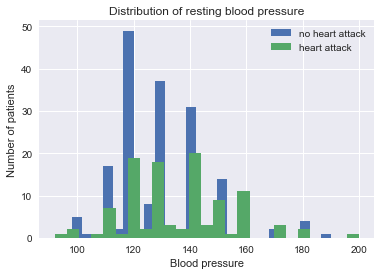

In [24]:
hist_df['trestbps'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

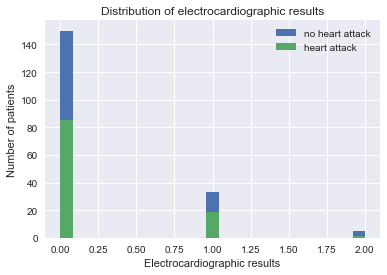

In [25]:
hist_df['restecg'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of electrocardiographic results')
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

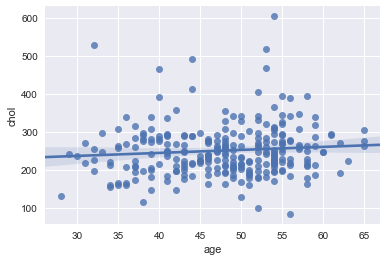

In [26]:
sns.regplot(data = df, x = 'age', y = 'chol')

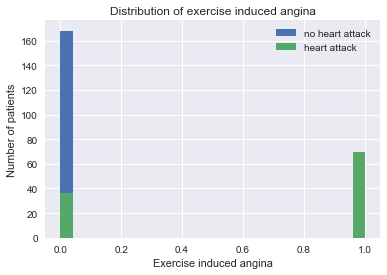

In [27]:
hist_df['exang'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of exercise induced angina')
plt.xlabel('Exercise induced angina')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

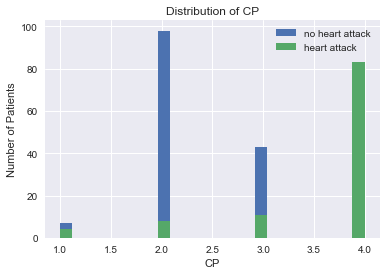

In [28]:
hist_df['cp'].hist(bins = 25)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('no heart attack', 'heart attack'))
plt.show()

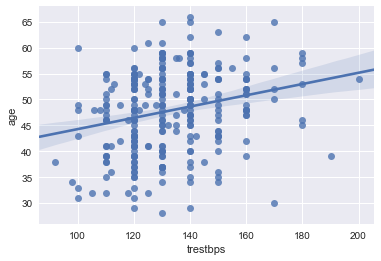

In [29]:
sns.regplot(data = df, x = 'trestbps', y = 'age')

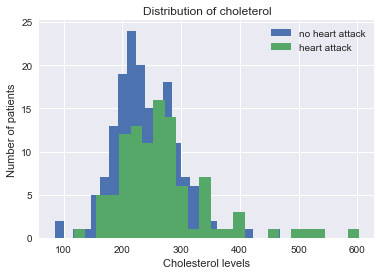

In [30]:
hist_df['chol'].hist(bins = 25, label = hist_df['Num'])
plt.title('Distribution of choleterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

### Patients who didn't suffer heart attacks

In [31]:
patients_no_heart_attack = df[df['Num'] == 0]

In [32]:
patients_no_heart_attack.groupby('Num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Num,,,,,,,,,,,,,
0,46.893617,0.632979,2.617021,130.73262,239.952941,0.038462,0.228723,145.005348,0.101604,0.214362,1.612903,0.0,4.866667


###  Patients who suffered Heart Attacks 

In [33]:
heart_attack_patients = df[df['Num'] == 1]

In [34]:
heart_attack_patients.groupby('Num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Num,,,,,,,,,,,,,
1,49.481132,0.886792,3.632075,135.849057,269.188119,0.125,0.2,128.764151,0.660377,1.245283,2.013699,0.0,6.538462


In [35]:
# Seperating the dataframe into a women individually and men

men = df[df['sex'] == 1]
women = df[df['sex'] == 0]

In [36]:
# Seperating the individual data frames of men and women into with/with-out heart attacks
# to do continued summary statistics

men_without_heart_attacks = men[men['Num'] == 0]
men_heart_attacks = men[men['Num'] == 1]

women_without_heart_attacks = women[women['Num'] == 0]
women_with_heart_attacks = women[women['Num'] == 1]

In [37]:
men_heart_attacks.thalach.mean()

128.2659574468085

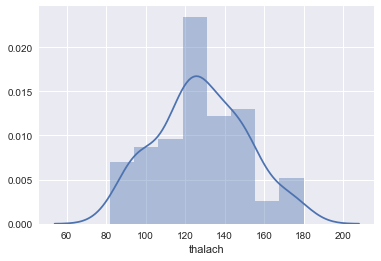

In [38]:
sns.distplot(men_heart_attacks.thalach)

In [39]:
men_without_heart_attacks.thalach.mean()

144.8235294117647

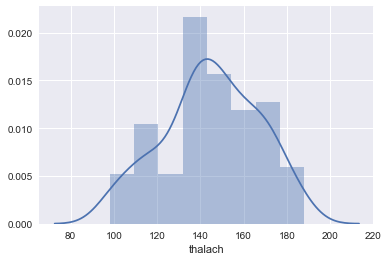

In [40]:
sns.distplot(men_without_heart_attacks.thalach)

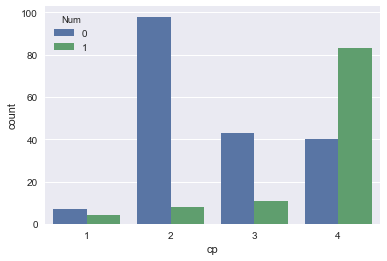

In [41]:
# Viewing the most occurring regions of chest pain for men
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
sns.countplot(x = 'cp', data = df, hue = 'Num')

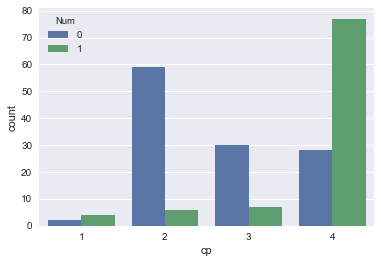

In [42]:
# Viewing the most occurring regions of chest pain for men
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
sns.countplot(x = 'cp', data = men, hue = 'Num')

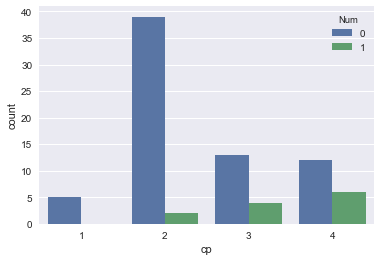

In [43]:
## Viewing the most occurring regions of chest pain for women
# 1 - typical angina
# 2 - atypical angina
# 3 - non-anginal pain
# 4 - asymptomatic
sns.countplot(x = 'cp', data = women, hue = 'Num')

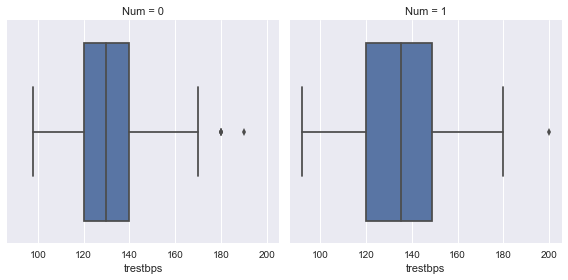

In [44]:
# A boxplot of the resting blood pressure of patients in categories
sns.factorplot(x = 'trestbps', data = df, col = 'Num', kind = 'box')

### Handling categorical data and multicolinearity

In [45]:
def get_gender(sex_value):
    
    gender_string = 'Male'
    
    if sex_value == 0:
        gender_string = 'Female'
    return gender_string

def get_cp_category(cp_value):
    
    if cp_value == 1:
        cp_string = 'typical'
    elif cp_value == 2:
        cp_string = 'atypical'
    elif cp_value == 3:
        cp_string = 'non_anginal'
    elif cp_value == 4:
        cp_string = 'asmptomatic'
    
    return(cp_string)

In [46]:
subset_df = df[['sex', 'cp']]

In [47]:
subset_df.head(5)

,sex,cp
0,1,2
1,1,2
2,1,2
3,0,1
4,0,2


In [48]:
subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
subset_df['cp'] = subset_df.cp.map(lambda x: get_cp_category(x))

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
subset_df.head(7)

,sex,cp
0,Male,atypical
1,Male,atypical
2,Male,atypical
3,Female,typical
4,Female,atypical
5,Female,atypical
6,Male,atypical


In [50]:
one_hot_df = pd.get_dummies(subset_df[['sex', 'cp']])

In [51]:
one_hot_df.head(7)

,sex_Female,sex_Male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,1,0,0,0,0,1
4,1,0,0,1,0,0
5,1,0,0,1,0,0
6,0,1,0,1,0,0


In [52]:
one_hot_df = one_hot_df.drop(['sex_Female'], axis = 1)

In [53]:
one_hot_df.columns

Index(['sex_Male', 'cp_asmptomatic', 'cp_atypical', 'cp_non_anginal',
       'cp_typical'],
      dtype='object')

In [54]:
one_hot_df.rename(columns = {'sex_Male': 'Male'}, inplace = True)

In [55]:
df = pd.concat([df, one_hot_df], axis = 1)

In [56]:
df = df.drop(['sex', 'cp'], axis = 1)

In [57]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'Num', 'Male', 'cp_asmptomatic',
       'cp_atypical', 'cp_non_anginal', 'cp_typical'],
      dtype='object')

In [58]:
df = df[['age', 'Male', 'cp_asmptomatic','cp_typical', 'cp_non_anginal', 'cp_atypical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'Num']]

In [59]:
df.head(7)

,age,Male,cp_asmptomatic,cp_typical,cp_non_anginal,cp_atypical,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Num
0,28,1,0,0,0,1,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,0,0,0,1,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,0,0,0,1,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,0,1,0,0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,0,0,0,1,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
5,32,0,0,0,0,1,105.0,198.0,0.0,0.0,165.0,0.0,0.0,NaN,NaN,NaN,0
6,32,1,0,0,0,1,110.0,225.0,0.0,0.0,184.0,0.0,0.0,NaN,NaN,NaN,0


In [60]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 16].values

In [61]:
imputer = Imputer(missing_values= "NaN", strategy= "mean", axis= 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

In [62]:
scale = StandardScaler()

In [63]:
X = scale.fit_transform(X)

## Model 1: Logistic Regression

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [65]:
logistic_model = LogisticRegression()

In [66]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
logistic_predictions = logistic_model.predict(X_test)

In [68]:
# Making/plotting the Confusion Matrix with plot_confusion_matrix function

def plot_confusion_matrix(cm, classes):
    fig, ax = plt.subplots(figsize=(5,5))
    cm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis]*2)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i,j], fmt), ha='center', va='center',
                    color='white' if cm[i,j] > thresh else 'black')    
        
    #plt.tight_layout()
    plt.xlabel('predicted label')
    plt.ylabel('true label')


# Make class labels for "heart attacks"
class_labels = np.array(['no-heart-attack','heart-attack'], dtype=str)

In [69]:
print(confusion_matrix(y_test, logistic_predictions))
print('\n')
print(classification_report(y_test, logistic_predictions))
print('\n')
print('Accuracy of logistic regression classifier {}'.format(logistic_model.score(X_test, y_test)))

[[53  6]
 [ 8 22]]


             precision    recall  f1-score   support

          0       0.87      0.90      0.88        59
          1       0.79      0.73      0.76        30

avg / total       0.84      0.84      0.84        89



Accuracy of logistic regression classifier 0.8426966292134831


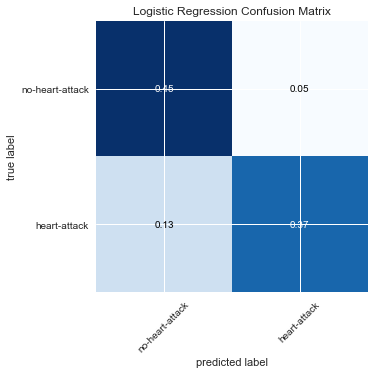

Accuracy of LogisticRegression is 0.84
Precision of LogisticRegression is 0.79
Recall of LogisticRegression is 0.73
ROC score of LogisticRegression is 0.82


In [70]:
# Plot confusion matrix on test set: Logistic Regression

cm_test_lr = confusion_matrix(y_test, logistic_predictions)
np.set_printoptions(precision=2)  

plot_confusion_matrix(cm_test_lr, class_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


print('Accuracy of LogisticRegression is %0.2f'% accuracy_score(y_test, logistic_predictions))
print('Precision of LogisticRegression is %0.2f'% precision_score(y_test, logistic_predictions))
print('Recall of LogisticRegression is %0.2f'% recall_score(y_test, logistic_predictions))
print('ROC score of LogisticRegression is %0.2f'% roc_auc_score(y_test, logistic_predictions))

## Implementing K-Fold Cross Validation

In [71]:
kfold = model_selection.KFold(n_splits= 10, random_state= 101)
cross_val_model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(cross_val_model, X_train, y_train, cv = kfold, scoring= scoring)

In [72]:
print('10 fold cross validation accuracy is {}%'.format(results.mean()))

10 fold cross validation accuracy is 0.8573809523809522%


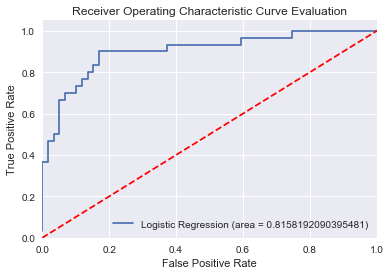

In [73]:
logistic_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.format(logistic_roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve Evaluation')
plt.legend(loc='lower right')
plt.show()

In [74]:
logistic_roc_auc

0.81581920903954808

## Model 2: Decision Tree

In [75]:
decision_tree = DecisionTreeClassifier()

In [76]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [77]:
tree_predictions = decision_tree.predict(X_test)

In [78]:
print(confusion_matrix(y_test, tree_predictions))
print('\n')
print(classification_report(y_test, tree_predictions))
print('Accuracy of decision tree classifier {}'.format(decision_tree.score(X_test, y_test)))

[[47 12]
 [11 19]]


             precision    recall  f1-score   support

          0       0.81      0.80      0.80        59
          1       0.61      0.63      0.62        30

avg / total       0.74      0.74      0.74        89

Accuracy of decision tree classifier 0.7415730337078652


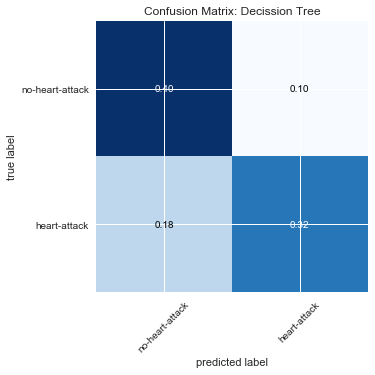

Accuracy of DecisionTree is 0.74
Precision of DecisionTree is 0.61
Recall of DecisionTree is 0.63
ROC score of DecisionTree is 0.71


In [79]:
cm_test_dt = confusion_matrix(y_test, tree_predictions)  
np.set_printoptions(precision=2)  

plot_confusion_matrix(cm_test_dt, class_labels)
plt.title('Confusion Matrix: Decission Tree')
plt.show()

print('Accuracy of DecisionTree is %0.2f'% accuracy_score(y_test, tree_predictions))
print('Precision of DecisionTree is %0.2f'% precision_score(y_test, tree_predictions))
print('Recall of DecisionTree is %0.2f'% recall_score(y_test, tree_predictions))
print('ROC score of DecisionTree is %0.2f'% roc_auc_score(y_test, tree_predictions))

## Model 3: Random Forest

In [80]:
df.columns

Index(['age', 'Male', 'cp_asmptomatic', 'cp_typical', 'cp_non_anginal',
       'cp_atypical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'Num'],
      dtype='object')

In [81]:
feature_labels = ['age', 'Male', 'cp_asmptomatic', 'cp_typical', 'cp_non_anginal',
       'cp_atypical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'Num']

In [82]:
random_forest = RandomForestClassifier(n_estimators= 300)

In [83]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [84]:
forest_predictions = random_forest.predict(X_test)

In [85]:
forest_score = random_forest.score(X_test, y_test)

In [86]:
forest_score

0.797752808988764

In [87]:
print(confusion_matrix(y_test, forest_predictions))
print('\n')
print(classification_report(y_test, forest_predictions))

[[51  8]
 [10 20]]


             precision    recall  f1-score   support

          0       0.84      0.86      0.85        59
          1       0.71      0.67      0.69        30

avg / total       0.80      0.80      0.80        89



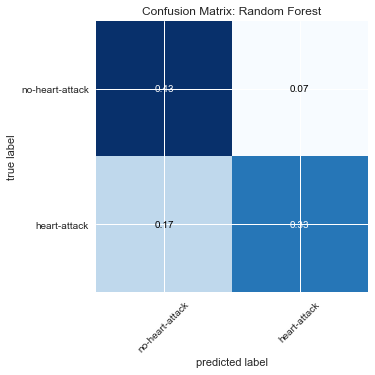

Accuracy of RandomForest is 0.80
Precision of RandomForest is 0.71
Recall of RandomForest is 0.67
ROC score of RandomForest is 0.77


In [88]:
cm_test_rf = confusion_matrix(y_test, forest_predictions)  
np.set_printoptions(precision=2)  

plot_confusion_matrix(cm_test_rf, class_labels)
plt.title('Confusion Matrix: Random Forest')
plt.show()

print('Accuracy of RandomForest is %0.2f'% accuracy_score(y_test, forest_predictions))
print('Precision of RandomForest is %0.2f'% precision_score(y_test, forest_predictions))
print('Recall of RandomForest is %0.2f'% recall_score(y_test, forest_predictions))
print('ROC score of RandomForest is %0.2f'% roc_auc_score(y_test, forest_predictions))

## New Random Forest Model Implementation Process

* Identifying most important features in the random forest model


* Creating a new model with the most important features 


* Train the new random forest model using most important features

In [89]:
for feature in zip(feature_labels, random_forest.feature_importances_):
    print(feature)

('age', 0.079185947228293266)
('Male', 0.038367643015057136)
('cp_asmptomatic', 0.07921220816350448)
('cp_typical', 0.0060803745397179912)
('cp_non_anginal', 0.01090702907051558)
('cp_atypical', 0.038489065689762555)
('trestbps', 0.068957754099933613)
('chol', 0.10673321950147023)
('fbs', 0.011615472059319877)
('restecg', 0.020196508807468611)
('thalach', 0.091721551388593059)
('exang', 0.16352695706942169)
('oldpeak', 0.11813864021600982)
('slope', 0.13314549147978541)
('ca', 0.0)
('thal', 0.033722137671146617)


## Plotting the importance of features

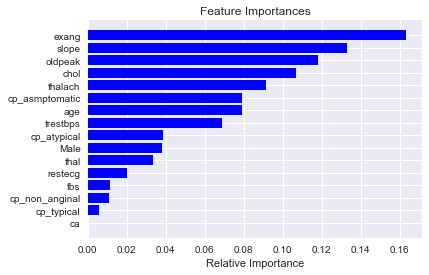

In [90]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [feature_labels[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [91]:
important_features = SelectFromModel(random_forest, threshold = 0.03)

In [92]:
important_features

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.03)

In [93]:
important_features.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.03)

In [94]:
for feature_list_index in important_features.get_support(indices= True):
    print(feature_labels[feature_list_index])

age
Male
cp_asmptomatic
cp_atypical
trestbps
chol
thalach
exang
oldpeak
slope
thal


In [95]:
X_important_train = important_features.transform(X_train)
X_important_test = important_features.transform(X_test)

In [96]:
important_forest = RandomForestClassifier(n_estimators= 300)

In [97]:
important_forest.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [98]:
y_important_feature_predictions = important_forest.predict(X_important_test)

In [99]:
print(confusion_matrix(y_test, y_important_feature_predictions))
print('\n')
print(classification_report(y_test, y_important_feature_predictions))

[[50  9]
 [ 8 22]]


             precision    recall  f1-score   support

          0       0.86      0.85      0.85        59
          1       0.71      0.73      0.72        30

avg / total       0.81      0.81      0.81        89



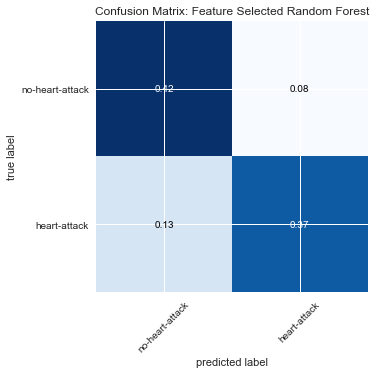

Accuracy of Feature Selected RandomForest is 0.81
Precision of Feature Selected RandomForest is 0.71
Recall of Feature Selected RandomForest is 0.73
ROC score of Feature Selected RandomForest is 0.79


In [100]:
cm_test_rf = confusion_matrix(y_test, y_important_feature_predictions)  
np.set_printoptions(precision=2)  

plot_confusion_matrix(cm_test_rf, class_labels)
plt.title('Confusion Matrix: Feature Selected Random Forest')
plt.show()

print('Accuracy of Feature Selected RandomForest is %0.2f'% accuracy_score(y_test, y_important_feature_predictions))
print('Precision of Feature Selected RandomForest is %0.2f'% precision_score(y_test, y_important_feature_predictions))
print('Recall of Feature Selected RandomForest is %0.2f'% recall_score(y_test, y_important_feature_predictions))
print('ROC score of Feature Selected RandomForest is %0.2f'% roc_auc_score(y_test, y_important_feature_predictions))

## Applying Random Search to random forest model for improved accuracy



* Random search will allow narrowing down the range of hyperparameters


* Random search will sample randomly from a distribution

In [101]:
# Examining what parameters are being used by the random forest
print("Parameters being used by random forest: \n")
pprint(random_forest.get_params())

Parameters being used by random forest: 

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [102]:
# Creating a parameter grid 
n_estimators = [int(x) for x in np.linspace(start = 200, stop= 1000, num= 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [103]:
# Creating a random grid
random_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [104]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [105]:
new_random_forest = RandomForestClassifier()

In [106]:
random_forest_random = RandomizedSearchCV(estimator= new_random_forest, param_distributions= random_grid, n_iter= 100, cv= 3, verbose= 2, random_state= 42, n_jobs= -1)

In [107]:
random_forest_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [108]:
# The best parameters for the random search
random_forest_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 822}

In [109]:
# Function for evaluating if the random search provided a better model than original random forest models
def model_evaluation(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors // test_labels)
    accuracy = 100 - mape
    print('The model performance')
    print('Average Error: {} degrees'.format(np.mean(errors)))
    print('Accuracy = {}%'.format(accuracy))
    
    return accuracy 

In [110]:
original_forest_accuracy = model_evaluation(random_forest, X_test, y_test)

The model performance
Average Error: 0.20224719101123595 degrees
Accuracy = 88.76404494382022%


C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in floor_divide
  """


In [111]:
best_random_forest = random_forest_random.best_estimator_

In [112]:
best_random_accuracy = model_evaluation(best_random_forest, X_test, y_test)

The model performance
Average Error: 0.19101123595505617 degrees
Accuracy = 91.01123595505618%


C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in floor_divide
  """


In [113]:
# Overall improvement from the original model accuracy to the random search model accuracy

print('Improvement of {}%'.format(100 * (best_random_accuracy - original_forest_accuracy) / original_forest_accuracy))

Improvement of 2.5316455696202533%


## Applying Grid Search to random forest model for improved accuracy

In [114]:
# Creating the parameter grid 
param_grid = {'bootstrap': [True],
           'max_depth': [30, 40, 50, 60],
           'max_features': [2, 3],
           'min_samples_leaf': [3, 4, 5],
           'min_samples_split': [6, 8, 10, 12],
           'n_estimators': [200, 300, 500, 700]}

In [115]:
final_random_forest = RandomForestClassifier()

In [116]:
grid_search_forest = GridSearchCV(estimator= final_random_forest, param_grid= param_grid, cv = 3, n_jobs= -1, verbose= 2)

In [117]:
grid_search_forest.fit(X_train, y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [30, 40, 50, 60], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [6, 8, 10, 12], 'n_estimators': [200, 300, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [118]:
grid_search_forest.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [119]:
best_grid_estimators = grid_search_forest.best_estimator_

In [120]:
grid_search_accuracy = model_evaluation(best_grid_estimators, X_test, y_test)

The model performance
Average Error: 0.20224719101123595 degrees
Accuracy = 89.88764044943821%


C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in floor_divide
  """


In [121]:
print('There is an improvement of {}% between the current grid search model and the origianl random forest model'.format( 100 * (grid_search_accuracy - original_forest_accuracy) / original_forest_accuracy))

There is an improvement of 1.2658227848101347% between the current grid search model and the origianl random forest model


In [122]:
print('There is an improvement of {}% between the current grid search model and the random seaerch model'.format( 100 * (grid_search_accuracy - best_random_accuracy) / best_random_accuracy))

There is an improvement of -1.2345679012345603% between the current grid search model and the random seaerch model


In [123]:
### The Algorithm Performance Of The Model Has Been Maxed Out

# Future Work

### Random under-sampling target variable

In [124]:
count_class_0, count_class_1 = df2.Num.value_counts()

#Dividing the classes

df_class_0 = df2[df2['Num'] == 0]
df_class_1 = df2[df2['Num'] == 1]


Random under-sampling
1    106
0    106
Name: Num, dtype: int64


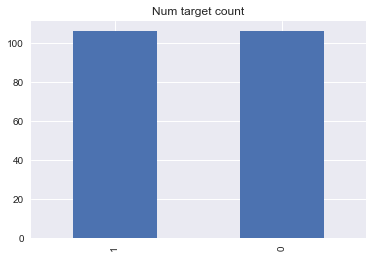

In [125]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

print('Random under-sampling')
print(df_test_under.Num.value_counts())

df_test_under.Num.value_counts().plot(kind = 'bar', title = 'Num target count')

### Random over-sampling target variable

Random over-sampling
1    188
0    188
Name: Num, dtype: int64


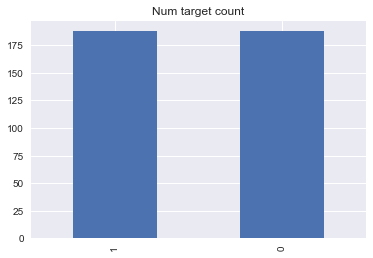

In [126]:
df_class_1_over = df_class_1.sample(count_class_0, replace= True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print('Random over-sampling')
print(df_test_over.Num.value_counts())

df_test_over.Num.value_counts().plot(kind = 'bar', title = 'Num target count')